# Auxilliary notebook to segregate countries into high-producing and low-producing agricultural countries

- **High-producing nations** - Countries having high agricultural production in USD per capita. The dataframe is grouped by country name and the mean agricultural production is calculated and sorted in descending order.
['Greece', 'Denmark', 'Australia', 'Saint Vincent and the Grenadines', 'New Zealand', 'France', 'Spain', 'Ireland', 'Uruguay', 'Costa Rica', 'Republic of Korea', 'Italy', 'Türkiye', 'Japan', 'Romania']
- **Low-producing nations** - Countries having low agricultural production in USD per capita and rank high in Global Hunger Index(GHI). 
- Bahrain, Singapore, Maldives, are countries with low agri production per capita which sounds awkward as these countries are not deficient in resources. So, to narrow down our search to really needy countries, we have taken GHI into consideration.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

- The total agricultural production of a country is found out by summing up categories across 'Primary Cereals', 'Crops', 'Food', 'Roots and Tubers', 'Sugar Crops', 'Vegetables and Fruit'.
- The Unit is 1000 USD.

In [2]:
#Data Preparation of FAO Crops Production dataset
prod_data = pd.read_csv('Dataset/archive/FAOSTAT/FAOSTAT_Agricultural_Production.csv')
prod_data = prod_data[prod_data['Element'] == 'Gross Production Value (current thousand US$)']
#Unit 1000 USD
prod_data = prod_data[['Area', 'Item', 'Year', 'Value']]
prod_pivot_df = prod_data.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', fill_value=0).reset_index()

prod_pivot_df['Total Agri Production'] =  prod_pivot_df['Cereals, primary'] + prod_pivot_df['Crops'] + prod_pivot_df['Food'] + prod_pivot_df['Roots and Tubers, Total'] + prod_pivot_df['Sugar Crops Primary'] + prod_pivot_df['Vegetables and Fruit Primary'] 
agri_prod_data = prod_pivot_df[['Area', 'Year', 'Total Agri Production']]
agri_prod_data.rename(columns={'Area':'Country'}, inplace=True)

# agri_prod_data = agri_prod_data[agri_prod_data['Year'] == 2007]
agri_prod_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\2337067285.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_prod_data.rename(columns={'Area':'Country'}, inplace=True)


Item,Country,Year,Total Agri Production
0,Albania,1993,1885819
1,Albania,1994,1824978
2,Albania,1995,1464974
3,Albania,1996,1602148
4,Albania,1997,1431983
...,...,...,...
4583,Zimbabwe,2014,2066854
4584,Zimbabwe,2015,8115467
4585,Zimbabwe,2016,9123513
4586,Zimbabwe,2017,9537181


In [3]:
#Import population data
population_data = pd.read_csv('Dataset/archive/FAOSTAT/FAOSTAT_Population.csv')
population_data = population_data[['Area', 'Year', 'Unit', 'Value']]

#Unit is 1000 No
population_data['Value'] = population_data['Value'] * 1000
population_data.drop(['Unit'], axis = 1, inplace=True)
population_data.rename(columns={'Area': 'Country', 'Value':'Population'}, inplace=True)

population_data

,Country,Year,Population
0,Afghanistan,1950,7480461.0
1,Afghanistan,1951,7571537.0
2,Afghanistan,1952,7667533.0
3,Afghanistan,1953,7764546.0
4,Afghanistan,1954,7864285.0
...,...,...,...
15538,Zimbabwe,2017,14751101.0
15539,Zimbabwe,2018,15052184.0
15540,Zimbabwe,2019,15354608.0
15541,Zimbabwe,2020,15669666.0


In [4]:
#Merge population data with Prod Indices to find Gross_Prod_Per_Capita for each country
agri_percapita_data = pd.merge(agri_prod_data, population_data, how='inner', on=['Country','Year'])
agri_percapita_data['Agri_Prod_Per_Capita'] = (agri_percapita_data['Total Agri Production']/agri_percapita_data['Population'])*1000
agri_percapita_data
# agri_percapita_data.to_csv('Agri.csv', index=False)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
0,Albania,1993,1885819,3300711.0,571.337206
1,Albania,1994,1824978,3293999.0,554.031134
2,Albania,1995,1464974,3284364.0,446.044957
3,Albania,1996,1602148,3271331.0,489.754170
4,Albania,1997,1431983,3253719.0,440.106537
...,...,...,...,...,...
4583,Zimbabwe,2014,2066854,13855753.0,149.169374
4584,Zimbabwe,2015,8115467,14154937.0,573.331199
4585,Zimbabwe,2016,9123513,14452704.0,631.266855
4586,Zimbabwe,2017,9537181,14751101.0,646.540282


## High-producing agricultural nations

In [5]:
#Define high-producing and low-producing agricultural nations
# Group by "Country" column and calculate the mean "Agri Production per capita"
country_mean_production = agri_percapita_data.groupby('Country')['Agri_Prod_Per_Capita'].mean()

top_15_countries = country_mean_production.sort_values(ascending=False).head(15)

print(top_15_countries)

Country
Greece                              2922.843768
Denmark                             2375.191531
Australia                           2352.471584
Saint Vincent and the Grenadines    2323.484332
New Zealand                         2181.876030
France                              1961.563981
Spain                               1930.884848
Ireland                             1736.491641
Uruguay                             1633.169653
Costa Rica                          1629.752129
Republic of Korea                   1612.394335
Italy                               1572.593395
Türkiye                             1535.061653
Japan                               1498.250219
Romania                             1490.483193
Name: Agri_Prod_Per_Capita, dtype: float64


In [6]:
country_mean_production_df = country_mean_production.reset_index()
country_mean_production_df

,Country,Agri_Prod_Per_Capita
0,Albania,1067.843262
1,Algeria,764.765525
2,Angola,539.123421
3,Antigua and Barbuda,394.421088
4,Argentina,1470.851605
...,...,...
166,Venezuela (Bolivarian Republic of),886.397859
167,Viet Nam,548.810066
168,Yemen,224.354406
169,Zambia,335.850486


## Plot world-map of agricultural production per capita

In [7]:
#Plot world-map of agricultural production per capita
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\2894751325.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [8]:
df_world_agri = df_world.merge(country_mean_production_df, how="left", left_on=['name'], right_on=['Country'])
print("Type of DataFrame : ", type(df_world_agri), df_world_agri.shape[0])
df_world_agri.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Agri_Prod_Per_Capita
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,600.561918
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,1417.077880
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,1437.959326


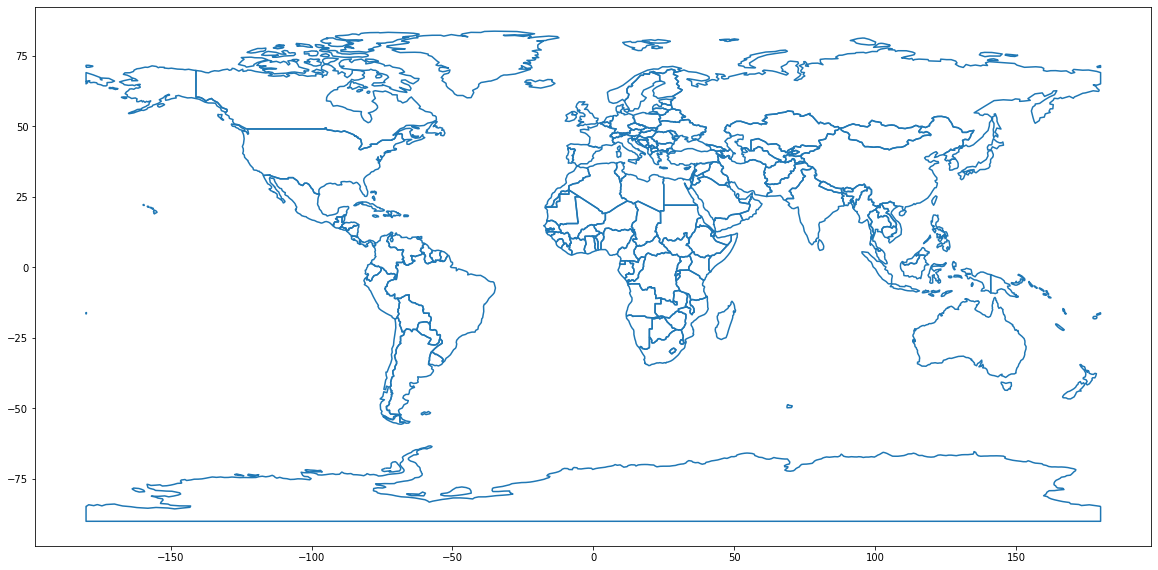

In [9]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))

In [10]:
#Function for plotting world map
def plot_map(df, column_name, title):
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad="0.5%")
    df.plot(column=column_name, ax=ax, cax=cax, cmap='OrRd',

    legend=True, legend_kwds={"label": title}, missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"})
    plt.show()

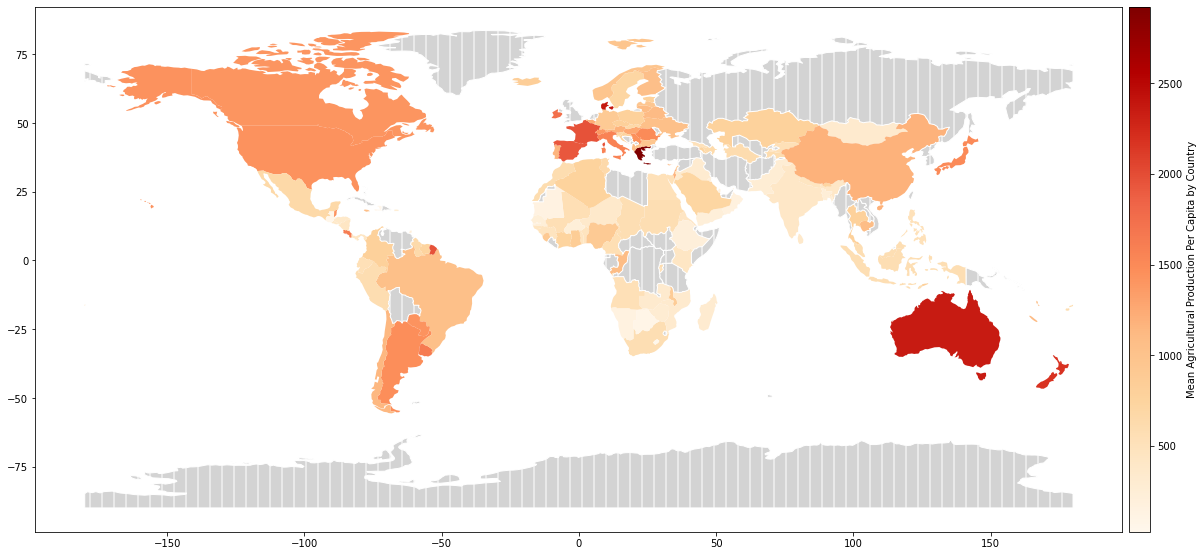

In [11]:
title = "Mean Agricultural Production Per Capita by Country"
plot_map(df_world_agri, "Agri_Prod_Per_Capita", title)

In [12]:
print(top_15_countries.index)

Index(['Greece', 'Denmark', 'Australia', 'Saint Vincent and the Grenadines',
       'New Zealand', 'France', 'Spain', 'Ireland', 'Uruguay', 'Costa Rica',
       'Republic of Korea', 'Italy', 'Türkiye', 'Japan', 'Romania'],
      dtype='object', name='Country')


## Low-producing agricultural nations

In [13]:
#Low-producing agricultural nations
bottom_20_countries = country_mean_production.sort_values(ascending=True).head(15)
print(bottom_20_countries)

Country
French Polynesia          5.173086
China, Hong Kong SAR      8.498708
Equatorial Guinea        15.687433
Singapore                16.329230
Maldives                 23.559016
Haiti                    25.771353
Lesotho                  47.145867
Comoros                  51.477508
Guatemala                62.262710
Belgium-Luxembourg       63.008065
Botswana                 73.272935
Bahrain                  74.549151
Mauritania              149.108985
Gambia                  149.407114
Ethiopia PDR            153.439696
Name: Agri_Prod_Per_Capita, dtype: float64


In [14]:
agri_percapita_data = agri_percapita_data[agri_percapita_data['Year'] == 2007]
agri_percapita_data.sort_values(by='Agri_Prod_Per_Capita', inplace=True)

agri_percapita_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\274111305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_percapita_data.sort_values(by='Agri_Prod_Per_Capita', inplace=True)


,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
2614,Maldives,2007,1311,325126.0,4.032283
942,"China, Hong Kong SAR",2007,39853,7001456.0,5.692102
3795,Singapore,2007,73083,4663256.0,15.672097
1410,Equatorial Guinea,2007,26034,948814.0,27.438465
544,Botswana,2007,106822,1966977.0,54.307702
...,...,...,...,...,...
1593,France,2007,135335632,61329376.0,2206.701598
170,Australia,2007,47221660,20830828.0,2266.912290
3916,Spain,2007,106586556,45245782.0,2355.723590
1255,Denmark,2007,14875860,5479722.0,2714.710710


In [15]:
agri_percapita_data.sort_values(by='Agri_Prod_Per_Capita', ascending = False, inplace=True)
agri_percapita_data.head(10)

C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\3229482977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_percapita_data.sort_values(by='Agri_Prod_Per_Capita', ascending = False, inplace=True)


,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
1753,Greece,2007,37858403,11091493.0,3413.282865
1255,Denmark,2007,14875860,5479722.0,2714.710710
3916,Spain,2007,106586556,45245782.0,2355.723590
170,Australia,2007,47221660,20830828.0,2266.912290
1593,France,2007,135335632,61329376.0,2206.701598
2968,New Zealand,2007,9056007,4221494.0,2145.213756
4286,Türkiye,2007,142447427,70468869.0,2021.423488
3469,Republic of Korea,2007,97159787,48220601.0,2014.902033
2108,Ireland,2007,8030029,4359834.0,1841.819895
2170,Italy,2007,105345578,58778482.0,1792.247340


In [16]:
top_country_names = agri_percapita_data['Country'].head(10).tolist()
print(top_country_names)

['Greece', 'Denmark', 'Spain', 'Australia', 'France', 'New Zealand', 'Türkiye', 'Republic of Korea', 'Ireland', 'Italy']


In [17]:
agri_percapita_data.tail(10)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
4376,United Republic of Tanzania,2007,6077272,41716497.0,145.680305
3711,Senegal,2007,1596533,11563869.0,138.062183
4564,Zambia,2007,1515440,12402073.0,122.192475
425,Benin,2007,1002417,8647761.0,115.916363
3438,Qatar,2007,142028,1231893.0,115.292481
544,Botswana,2007,106822,1966977.0,54.307702
1410,Equatorial Guinea,2007,26034,948814.0,27.438465
3795,Singapore,2007,73083,4663256.0,15.672097
942,"China, Hong Kong SAR",2007,39853,7001456.0,5.692102
2614,Maldives,2007,1311,325126.0,4.032283


In [18]:
#Import Global Hunger Index Data(Reference: https://www.globalhungerindex.org/)
sheet_index = 2
GHI_data = pd.read_excel('Dataset/archive/Global_Hunger_Index_Scores.xlsx', sheet_name=sheet_index)
GHI_data.columns = GHI_data.iloc[1]
GHI_data = GHI_data.iloc[2:-3] #Delete the first and bottom 2 rows
GHI_data.columns = ['Country', '2000', '2007', '2014', '2022', 'Absolute change since 2014', '% change since 2014']
GHI_2007 = GHI_data[['Country', '2007']]
#The dataset contains non-numeric values like '-'
GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
GHI_2007.dropna(inplace = True)
GHI_2007.sort_values(by='2007', ascending=False, inplace=True)
GHI_2007
# gdp_data_2007 = world_gdp_data[world_gdp_data['year'] == 2007]

C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\2906006307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\2906006307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI_2007.dropna(inplace = True)
C:\Users\saumy\AppData\Local\Temp\ipykernel_19568\2906006307.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Country,2007
109,Sierra Leone,51.1
25,Chad,49.0
24,Central African Republic,46.8
136,Zambia,46.0
122,Timor-Leste,45.5
...,...,...
110,Slovakia,5.9
126,Türkiye,5.8
103,Romania,5.8
6,Argentina,5.5


In [19]:
hunger_index_data = pd.merge(agri_percapita_data, GHI_2007, how='inner', on='Country')

In [20]:
hunger_index_data.rename(columns={'2007': 'GHI'}, inplace=True)
hunger_index_data.sort_values(by='GHI', ascending=False, inplace=True)
hunger_index_data.head(20)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita,GHI
45,Chad,2007,5383478,1.072273e+07,502.062208,49.0
77,Zambia,2007,1515440,1.240207e+07,122.192475,46.0
67,Ethiopia,2007,21747172,8.199618e+07,265.221754,42.6
62,Niger,2007,5388683,1.489787e+07,361.708212,40.2
66,Yemen,2007,6276247,2.264154e+07,277.200559,38.4
57,Madagascar,2007,8319069,1.992496e+07,417.520027,37.2
54,India,2007,532586786,1.189692e+09,447.667860,36.3
37,Rwanda,2007,5792626,9.523168e+06,608.266703,35.9
44,Côte d'Ivoire,2007,10732513,1.981770e+07,541.561988,35.8
48,Mali,2007,6773065,1.408091e+07,481.010392,35.7


## Scatter plot of agricultural Production Per Capita vs GHI by Country (Year 2007)

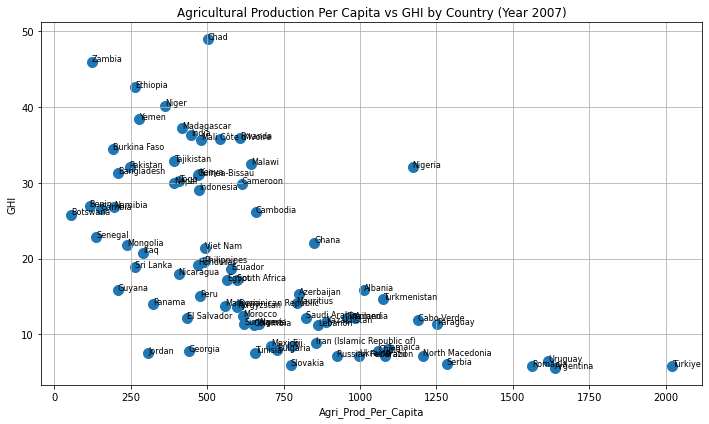

In [21]:
# Data Visualization
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hunger_index_data['Agri_Prod_Per_Capita'], hunger_index_data['GHI'], marker='o', s=100)

plt.xlabel('Agri_Prod_Per_Capita')
plt.ylabel('GHI')
plt.title('Agricultural Production Per Capita vs GHI by Country (Year 2007)')

# Add country labels
for i, row in hunger_index_data.iterrows():
    plt.annotate(row['Country'], (row['Agri_Prod_Per_Capita'], row['GHI']), fontsize=8)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

I will take those countries where Gross Prod Per Capita is less and GHI is high and compare with those countries where Agri Prod Per Capita is high. Analyze the underlying factors for these countries.

In [22]:
low_gross_prod_capita = hunger_index_data['Agri_Prod_Per_Capita'] < 500
high_ghi = hunger_index_data['GHI'] > 25
countries_of_interest = hunger_index_data[low_gross_prod_capita & high_ghi]
country_names = countries_of_interest['Country'].tolist()
print(country_names)

['Zambia', 'Ethiopia', 'Niger', 'Yemen', 'Madagascar', 'India', 'Mali', 'Burkina Faso', 'Tajikistan', 'Pakistan', 'Bangladesh', 'Kenya', 'Guinea-Bissau', 'Togo', 'Nepal', 'Indonesia', 'Benin', 'Namibia', 'Gambia', 'Botswana']



Ethiopia: Ethiopia has a large rural population and significant agricultural potential. Improving infrastructure and farming techniques can enhance agricultural production.

India: India is an agricultural powerhouse but faces issues like land fragmentation and water scarcity. Sustainable practices and technology adoption could boost production.

Kenya: Kenya has a growing agricultural sector, and investments in modern farming techniques and infrastructure can increase productivity.

Indonesia: Indonesia is an archipelago with diverse crops. Focused efforts on sustainable farming and addressing climate-related challenges can enhance production.

Bangladesh: Bangladesh has a dense population, and sustainable farming methods and access to technology can lead to increased agricultural output.

These countries offer a mix of agricultural systems, challenges, and potential solutions, making them suitable for an in-depth study on agricultural production.

[Ethiopia, India, Kenya, Indonesia, Bangladesh]
